In [1]:
!pip install kaggle


In [2]:
from google.colab import files
print("Please upload your kaggle.json file")
files.upload()

Please upload your kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hiruna1","key":"9714130537f084215673f2081071682b"}'}

In [3]:
# Step 3: Configure Kaggle and download the dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download hopesb/student-depression-dataset

Dataset URL: https://www.kaggle.com/datasets/hopesb/student-depression-dataset
License(s): apache-2.0
  0% 0.00/454k [00:00<?, ?B/s]
100% 454k/454k [00:00<00:00, 221MB/s]


In [5]:
# Step 4: Unzip the dataset
!unzip student-depression-dataset.zip
print("\n✅ Kaggle dataset downloaded and ready to use!")

Archive:  student-depression-dataset.zip
  inflating: Student Depression Dataset.csv  

✅ Kaggle dataset downloaded and ready to use!


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sns.set(style="whitegrid")

In [8]:
file_path = 'Student Depression Dataset.csv'
df = pd.read_csv(file_path)

 --- **Exploratory Data Analysis** ---

**First 5 Rows of the Dataset**

In [9]:
display(df.head())

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


**summary of the DataFrame, including data types and non-null counts**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

**Descriptive Statistics**

In [11]:
display(df.describe())

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


**Separate into Features (X) and Target (y)**


In [12]:
y = df['Depression']
X = df.drop(columns=['Depression'], errors='ignore')

**--- Handling Missing Values ---**

In [13]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Financial Stress    3
dtype: int64


** Create the bar chart to show the missing values**

/tmp/ipython-input-710432138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


✅ 'missing_values_before.png' has been saved.


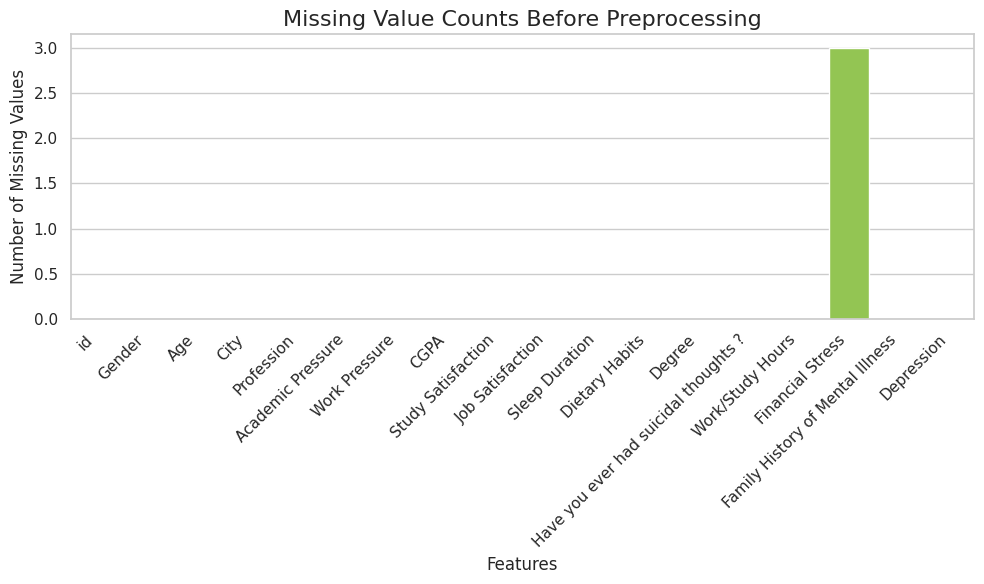

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Missing Value Counts Before Preprocessing', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.tight_layout() # Adjust layout to make room for labels
plt.savefig('missing_values_before.png')
print("✅ 'missing_values_before.png' has been saved.")
plt.show()

**Fill missing numerical values with the MEDIAN**

In [15]:
numerical_cols = X.select_dtypes(include=np.number).columns

In [16]:
for col in numerical_cols:
    if X[col].isnull().any():
        median_val = X[col].median()
        X[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")

Filled missing values in 'Financial Stress' with median: 3.0


/tmp/ipython-input-1308849357.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(median_val, inplace=True)


**Verify that all missing values have been handled**

In [17]:
print(f"\nTotal missing values remaining in X: {X.isnull().sum().sum()}")


Total missing values remaining in X: 0


**Combine X and Y back into one DataFrame**

In [18]:
final_cleaned_df = pd.concat([X, y], axis=1)

**Create a plot to visually confirm that no missing values are left**

/tmp/ipython-input-1045203474.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_after.index, y=missing_after.values, palette="plasma")


✅ 'missing_values_after.png' has been saved.


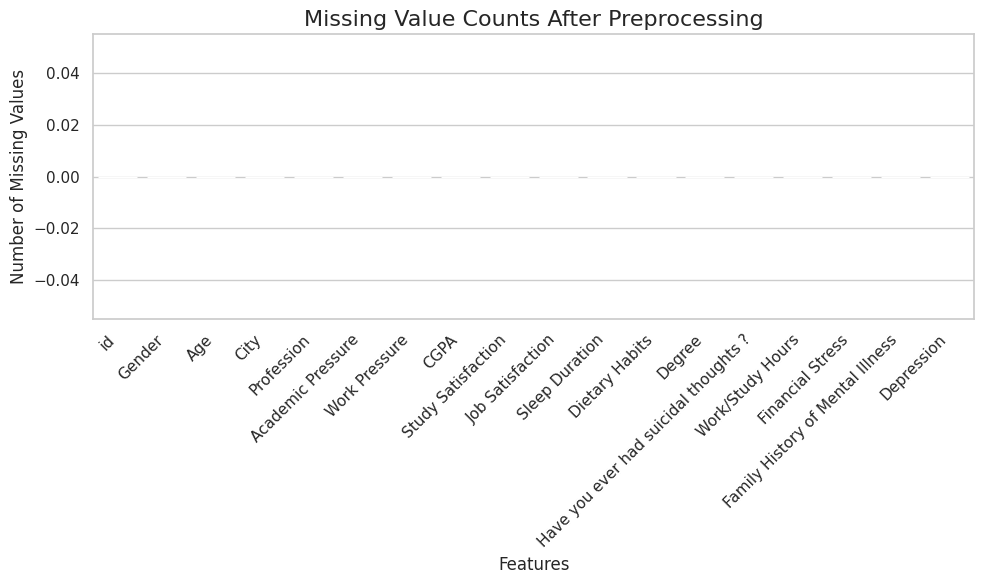

In [19]:
plt.figure(figsize=(10, 6))
missing_after = final_cleaned_df.isnull().sum()
sns.barplot(x=missing_after.index, y=missing_after.values, palette="plasma")
plt.xticks(rotation=45, ha='right')
plt.title('Missing Value Counts After Preprocessing', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.tight_layout()
plt.savefig('missing_values_after.png')
print("✅ 'missing_values_after.png' has been saved.")
plt.show()


**Save the combined, clean data to a new file**

In [21]:
print(f"\nTotal missing values remaining: {final_cleaned_df.isnull().sum().sum()}")


Total missing values remaining: 0


In [20]:
final_cleaned_df.to_csv('data_no_missing.csv', index=False)